# Projet Python 2021 : Prévoir le salaire d'un joueur de NBA

**Projet Semestre 1 de 2A - ENSAE** : Adam Guiffard et Naël Farhan

## Introduction

**Motivation** : Etant tous les deux intéressés par le sport, nous voulions chercher à réaliser un projet en lien avec ce domaine. Nous nous sommes alors tournés vers le basketball et la NBA, une ligue fermée ayant des caractéristiques différentes des autres ligues de sport qui en fait un objet intéressant pour notre projet. Par exemple, toutes les équipes ont un budget total qui ne doit pas dépasser un certain seuil lorsqu'elles doivent rémunérer leurs joueurs (ce qu'on appelle un "cap space"). Ainsi, contrairement au domaine du football, les salaires sont souvent du même ordre de grandeur entre les différentes équipes, ce qui fait que les bons joueurs sont souvent mieux répartis dans les équipes, contrairement au football où les équipes riches accaparent les talents et les plus pauvres se retrouvent avec des joueurs moins bons.

**Déroulé du projet** : Notre projet consistait donc à tenter de prédire le mieux possible le salaire d'un joueur NBA selon plusieurs variables explicatives qui sont couramment utilisées dans les débats pour affirmer qu'un joueur est bon ou non. Nous avons dans un second temps tenté de déterminer si certaines équipes arrivaient suivant nos modèles à payer peu cher de bons joueurs, ou au contraire payer trop cher de mauvais joueurs.
 Tout d'abord, faute d'avoir pu trouver des bases de données contenant les variables qui nous intéressaient, nous avons scrapé les données via une API d'un site spécialisé en sport américain. Nous avons par la suite enrichi les données obtenues en créant ces variables explicatives. Ensuite nous avons réalisé une analyse exploratoire des données en faisant plusieurs remarques sur la propreté des données puis en calculant quelques statistiques descriptives sur différentes variables de nos données. Enfin, nous avons construit différents modèles, de régression et de Machine Learning, afin de prédire au mieux le salaire d'un joueur NBA et de tenter de dire si certaines équipes surpaient ou sous-paient ses joueurs.

**Import des modules et des données**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_21= pd.read_csv('modified data\data21.csv')
df_20= pd.read_csv('modified data\data20.csv')
df_19= pd.read_csv('modified data\data19.csv')
df_21nd= pd.read_csv('unduplicated data\data21nd.csv')
df_20nd= pd.read_csv('unduplicated data\data20nd.csv')
df_19nd= pd.read_csv('unduplicated data\data19nd.csv')

## I - Création et modification des bases de données

### 1 - L'API sportsipy

Lors de nos recherches de base de données, nous avons eu du mal à trouver une base de données qui possédaient à la fois la majorité des statistiques brutes et avancées mesurant la performance d'un joueur lors d'une saison ainsi que son salaire et son équipe, car il fallait prendre des bases de différentes sources qui ne se recoupaient pas au niveau des noms de joueurs (convention différentes) ou même du nombre total de joueur sur une saison. Nous sommes alors tombés sur l'API python *sportsipy* qui est reliée au site *https://www.basketball-reference.com/*, qui possèdent toutes les données possibles et imaginables sur la NBA. Néanmoins, il a fallu du temps pour comprendre comment elle fonctionnait car la documentation était relativement peu commentée et il y avait beaucoup de classes qui avaient l'air de se ressembler mais qui étaient très différentes.
Dans le notebook "web scraping to create data", nous avons fait une fonction qui permet pour une saison donnée de former un DataFrame contenant le salaire, les statistiques données par l'API et l'équipe de chaque joueur. La création d'une base pour une seule saison prend une vingtaine de minutes pour des raisons que nous pensons être dûes à l'API puisque dans un tour de boucle, les calculs prenaient déjà beaucoup de temps (notamment récupérer les joueurs d'une équipe). Nous avons donc récupéré les données uniquement des saisons 2018-19 à 2020-21, qui sont dans le dossier *scraped data*.

### 2 - Création de variables supplémentaires et lignes dupliquées

**Varables supplémentaires** : Les 3 statistiques brutes les plus courantes au basketball sont les points marqués, les rebonds pris et les passes décisives délivrées. Les joueurs n'ayant pas joué le même nombre de matchs, il est plus pertinent de considérer ces variables en moyenne par match. Le notebook "other players indicators" crée ces nouvelles variables et les exportent en fichier csv dans le dossier *modified data*. Notons qu'il existait dans la base les poits, rebonds et passes décisives par possession (qui correspond à une séquence où une équipe a possession de la balle). Ces variables sont également intéressantes, mais il arrive parfois q'un joueur avec beaucoup de points par possession joue peu de temps et que ce nombre vienne à baisser si son temps de jeu venait à augmenter (plus de fatigue, cohabitation avec des stars qui tirent beaucoup...) : ainsi, la statistique par match favorise les joueurs qui jouent beaucoup, et qui sont donc censés être meilleur, du moins selon leur coach.

In [11]:
df_19[df_19.groupby('name')['name'].transform('size') > 1].sort_values(by=['name'])

,and_ones,assist_percentage,assists,assists_per_poss,block_percentage,blocking_fouls,blocks,blocks_per_poss,box_plus_minus,center_percentage,...,usage_percentage,value_over_replacement_player,weight,win_shares,win_shares_per_48_minutes,name,team,points_per_game,reb_per_game,ast_per_game
558,NaN,13.7,128.0,4.6,1.3,NaN,21.0,0.7,-1.2,0,...,19.0,0.3,214,1.5,0.052,Alec Burks,CLE,8.765625,3.671875,2.000000
90,NaN,13.7,128.0,4.6,1.3,NaN,21.0,0.7,-1.2,0,...,19.0,0.3,214,1.5,0.052,Alec Burks,SAC,8.765625,3.671875,2.000000
424,NaN,13.7,128.0,4.6,1.3,NaN,21.0,0.7,-1.2,0,...,19.0,0.3,214,1.5,0.052,Alec Burks,UTA,8.765625,3.671875,2.000000
212,NaN,17.1,24.0,6.3,0.9,NaN,2.0,0.5,-7.1,0,...,16.8,-0.2,213,-0.1,-0.027,Andrew Harrison,NOP,3.176471,1.176471,1.411765
288,NaN,17.1,24.0,6.3,0.9,NaN,2.0,0.5,-7.1,0,...,16.8,-0.2,213,-0.1,-0.027,Andrew Harrison,MEM,3.176471,1.176471,1.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,NaN,11.1,160.0,3.7,0.7,NaN,17.0,0.4,-1.8,0,...,17.8,0.1,220,2.7,0.062,Wesley Matthews,IND,12.173913,2.463768,2.318841
160,NaN,11.1,160.0,3.7,0.7,NaN,17.0,0.4,-1.8,0,...,17.8,0.1,220,2.7,0.062,Wesley Matthews,DAL,12.173913,2.463768,2.318841
548,NaN,11.1,160.0,3.7,0.7,NaN,17.0,0.4,-1.8,0,...,17.8,0.1,220,2.7,0.062,Wesley Matthews,NYK,12.173913,2.463768,2.318841
380,NaN,9.1,82.0,3.3,1.4,NaN,21.0,0.8,-2.8,0,...,11.8,-0.2,235,1.5,0.062,Wilson Chandler,PHI,5.980392,4.215686,1.607843


**Lignes dupliquées** : En NBA, l'une des particularités est que les joueurs peuvent être transférés au cours de saison, et donc jouer pour 2 équipes différentes ou plus au cours de la même saison. Sur le tableau ci-dessus, qui représente l'ensemble des lignes où le nom d'un joueur apparaît 2 fois ou plus (joueurs transférés) lors de la saison 2020-21, on remarque que les statistiques de performance sont les mêmes quelque soit l'équipe. Autrement dit, les données ne donnent pas les statistiques d'un joueur uniquement sur les matchs joués avec chaque équipe, mais les statistiques globales sur la saison. Face à ce problème nous avons choisi de procéder ainsi : dans certains cas (notamment les comparaisons par équipe), nous garderons toutes les données ; dans d'autres, nous choisissons aléatoirement une équipe à laquelle sera affilié le joueur, puisque nous n'avons pas pu trouver de données donnant tous les joueurs transférés et l'équipe où ils ont le plus joué (ce qui aurait été préférable). Dans le notebook "remove duplicated", nous faisons ceci et exportons ces nouvelles données dans le dossier *unduplicated data*.

## II - Analyse exploratoire et statistiques descriptives

### 1 - Premières remarques

In [8]:
print(len(df_19),len(df_20),len(df_21))

622 592 626


Il y a 444 joueurs qui apparaissent 1 fois dans la base de 2019
Il y a 80 joueurs qui apparaissent 2 fois dans la base de 2019
Il y a 6 joueurs qui apparaissent 3 fois dans la base de 2019
Il y a 470 joueurs qui apparaissent 1 fois dans la base de 2020
Il y a 58 joueurs qui apparaissent 2 fois dans la base de 2020
Il y a 2 joueurs qui apparaissent 3 fois dans la base de 2020
Il y a 461 joueurs qui apparaissent 1 fois dans la base de 2021
Il y a 72 joueurs qui apparaissent 2 fois dans la base de 2021
Il y a 7 joueurs qui apparaissent 3 fois dans la base de 2021


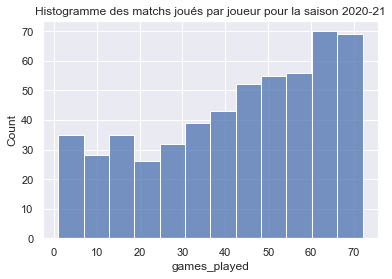

In [5]:
%run "./first remarks.ipynb"

In [9]:
df_19[df_19.groupby('name')['name'].transform('size') > 1].sort_values(by=['name']).head()

,and_ones,assist_percentage,assists,assists_per_poss,block_percentage,blocking_fouls,blocks,blocks_per_poss,box_plus_minus,center_percentage,...,usage_percentage,value_over_replacement_player,weight,win_shares,win_shares_per_48_minutes,name,team,points_per_game,reb_per_game,ast_per_game
558,NaN,13.7,128.0,4.6,1.3,NaN,21.0,0.7,-1.2,0,...,19.0,0.3,214,1.5,0.052,Alec Burks,CLE,8.765625,3.671875,2.000000
90,NaN,13.7,128.0,4.6,1.3,NaN,21.0,0.7,-1.2,0,...,19.0,0.3,214,1.5,0.052,Alec Burks,SAC,8.765625,3.671875,2.000000
424,NaN,13.7,128.0,4.6,1.3,NaN,21.0,0.7,-1.2,0,...,19.0,0.3,214,1.5,0.052,Alec Burks,UTA,8.765625,3.671875,2.000000
212,NaN,17.1,24.0,6.3,0.9,NaN,2.0,0.5,-7.1,0,...,16.8,-0.2,213,-0.1,-0.027,Andrew Harrison,NOP,3.176471,1.176471,1.411765
288,NaN,17.1,24.0,6.3,0.9,NaN,2.0,0.5,-7.1,0,...,16.8,-0.2,213,-0.1,-0.027,Andrew Harrison,MEM,3.176471,1.176471,1.411765


### 2 - Variable 'salary'

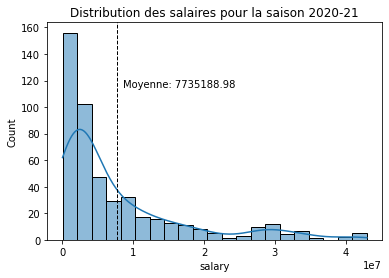

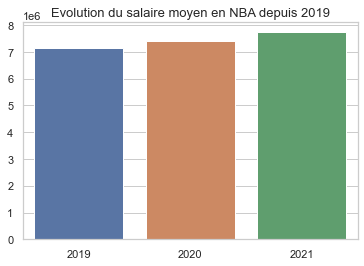

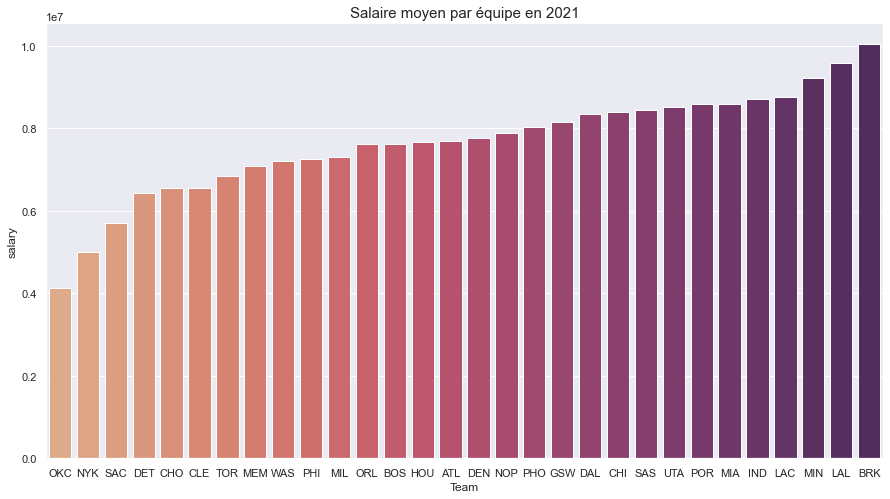

In [1]:
%run "./salary stat desc.ipynb"

### 3 - Variables explicatives retenues

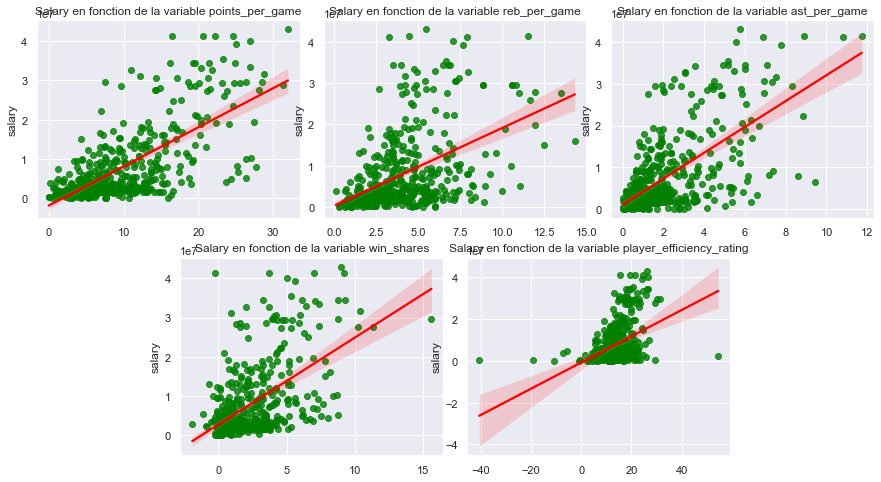

In [6]:
%run "./retained explanatory variables.ipynb"

## III - Modélisation et prévision